# **Prueba ML Analyst - Notebook de Análisis exploratorio y feature engineering**
 


## Introduction:
El objetivo de este análisis es usar datos recopilados sobre llamadas de una campaña  comercial del banco para clasificar nuevas instancias o
llamadas con el fin de detectar si el cliente se suscribirá o no al producto  de depósito  a plazo(aceptan la campaña)y con que probabilidad.

La etiqueta de las instancias es 'suscribed' que puede tomar 2 valores: yes o no, dependiendo de si la persona acepto la campaña y se suscribió al producto o no.

## Pregunta objetivo:
¿Cuál sería la etiqueta de las instancias no clasificadas? , ¿Según los datos  las personas no etiquetadas a las que se contacta se suscribirán o no al producto financiero ofrecido por la campaña?

# Contenido 
1.   Perfilado de datos
2.   Distribución de la variable objetivo
3.   Revisando el balance de los datos
4.   Correlación entre variables numericas
5.   Feture engineering
6.   Variables con alta cardinalidad
7.   Label encoding para las pruebas estadísticas
8.   Test chi cuadrado.
9.   Creación de nuevas columnas
10.  Matriz de correlación.
11.  Guardando el dataset final.


In [383]:
#Importando las librerias necesarias
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import seaborn as sns
import numpy as np
from matplotlib import cm
import pandas as pd
from pandas_profiling import ProfileReport
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from scipy.stats import chi2_contingency


In [384]:
## Cargando el dataset preprocesado obtenido del anterior notebook "bank_camp_preprocessed.csv"
df=pd.read_csv("../data/interim/bank_camp_intermediate.csv",index_col=0)

In [385]:
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,5191,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,5191,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,5191,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,5191,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,4963,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,4963,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,4963,NaN
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,4963,NaN


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41175 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   job             41175 non-null  object 
 2   marital         41175 non-null  object 
 3   education       41175 non-null  object 
 4   housing         41175 non-null  object 
 5   loan            41175 non-null  object 
 6   contact         41175 non-null  object 
 7   month           41175 non-null  object 
 8   day_of_week     41175 non-null  object 
 9   duration        41175 non-null  int64  
 10  campaign        41175 non-null  int64  
 11  pdays           41175 non-null  int64  
 12  previous        41175 non-null  int64  
 13  poutcome        41175 non-null  object 
 14  emp.var.rate    41175 non-null  float64
 15  cons.price.idx  41175 non-null  float64
 16  cons.conf.idx   41175 non-null  float64
 17  nr.employed     41175 non-null 

In [387]:
#Creando un reporte con pandas profiling
#profile = ProfileReport(df, title='Bank_campaign', html={'style':{'full_width':True}})
#profile.to_notebook_iframe()

In [388]:
#Guardando el reporte
#profile.to_file("../reports/bank_capaign_data_profiling_univariate_report_.html")

## Resultados del perfilado de datos , observaciones:
 * La variable age contiene valores atípicos  de personas mayores a 90 años.
 * La variable default está fuertemente desbalanceada con un 79.1% de casos en los que el cliente no tiene credito en default, tan solo 3 casos en los que el cliente si tiene credito en default y 20.9% de casos en los que se desconoce este dato.
 * En la variable loan se observa que en el 82.4% de los contactos, el cliente no tiene vigente unn préstamo personal, el 15.2% si lo tiene y un 2.4% se desconoce si lo tiene o no.
 * La variable numerica duration que indica la duración de la llamada en segundos está sesgada hacia la izquierda mostrando una mayor cantidad de llamadas de corta duración. En concreto, el 75% de las llamadas tuvieron una duración inferior a los 319 segundos y el 95% de llamadas tuvieron una duración inferior a los 753 segundos.
* La variable campaign que indica el número de contactos realizados durante esta campaña y para este cliente esta fuertemente sesgada. Para el 75% de contactos, se tiene que  hubo menos de 3 contactos previos al contacto actual y para el 95% de los contactos se tiene que hubieron menos de 7 contactos previos, encontrando valores atípicos mayores a 30 y hata 56 contactos previos.

* La variable pdays que indica el número de dias transcurridos desde la última vez que se contactó al cliente de una campaña anterior muestra que el 96.3% de los valores son 999, esto podría ser considerado como una columna de valor unico, ya que los demás valores representan una porción de menos del 2 porciento de las observaciones, es posible que sea necesario borrar esta columna.
* La variable previous que indica el número de contactos realizados antes de esta campaña y para este cliente tiene un 86.3% de valores correspondientes a 0 contactos, un 11.1% de valores correspondientes a un contacto y el resto de categorias componen menos de un 2%.



## Es importante explicitar las variables que serán tratadas como categorías en el dataset.

In [389]:
# Definiendo las columnas categoricas como tipo categoria para que python las reconozca como tal.
df[['job','marital','education','housing','loan','contact','month','day_of_week','poutcome','previous']]=df[['job','marital','education','housing','loan','contact','month','day_of_week','poutcome','previous']].astype("category")
# Asignando tipo de dato category a la variable target
df['subscribed']=df['subscribed'].astype("category")


Separando las columnas numéricas, categóricas y el target para poder analizarlas.

In [390]:
categorical_cols=df[['job','marital','education','housing','loan','contact','month','day_of_week','poutcome','previous']]
target=df['subscribed']
numerical_cols=df[['age','duration','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed']]

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41175 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41175 non-null  int64   
 1   job             41175 non-null  category
 2   marital         41175 non-null  category
 3   education       41175 non-null  category
 4   housing         41175 non-null  category
 5   loan            41175 non-null  category
 6   contact         41175 non-null  category
 7   month           41175 non-null  category
 8   day_of_week     41175 non-null  category
 9   duration        41175 non-null  int64   
 10  campaign        41175 non-null  int64   
 11  pdays           41175 non-null  int64   
 12  previous        41175 non-null  category
 13  poutcome        41175 non-null  category
 14  emp.var.rate    41175 non-null  float64 
 15  cons.price.idx  41175 non-null  float64 
 16  cons.conf.idx   41175 non-null  float64 
 17  nr.employed 

In [392]:
#Descripcion de columnas numéricas
numerical_cols.describe()

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
count,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000
mean,40.023898,258.318421,2.567917,962.463922,0.081967,93.575736,-40.502725,5166.850055
std,10.420788,259.307930,2.770341,186.939285,1.570874,0.578836,4.627831,72.328321
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,4963.000000
25%,32.000000,102.000000,1.000000,999.000000,-1.800000,93.075000,-42.700000,5099.000000
50%,38.000000,180.000000,2.000000,999.000000,1.100000,93.749000,-41.800000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,1.400000,93.994000,-36.400000,5228.000000
max,98.000000,4918.000000,56.000000,999.000000,1.400000,94.767000,-26.900000,5228.000000


In [393]:
# Cantidad de valores unicos en las columnas categoricas
categorical_cols.describe().loc['unique']

job            11
marital         3
education       7
housing         2
loan            2
contact         2
month          10
day_of_week     5
poutcome        3
previous        8
Name: unique, dtype: object

In [394]:
target.describe().loc['unique']

2

In [395]:
numerical_cols.value_counts()

age  duration  campaign  pdays  emp.var.rate  cons.price.idx  cons.conf.idx  nr.employed
35   91        2         999     1.1          93.994          -36.4          5191           4
33   64        1         999     1.4          93.444          -36.1          5228           4
29   103       1         999    -0.1          93.200          -42.0          5195           4
     166       1         999     1.4          93.918          -42.7          5228           4
33   120       1         999     1.4          93.444          -36.1          5228           3
                                                                                           ..
34   274       2         999     1.4          94.465          -41.8          5228           1
     275       3         999    -1.8          92.893          -46.2          5099           1
     276       2         999    -1.8          92.893          -46.2          5099           1
                                 1.4          94.465          -41

## Graficando la distribución de la variable objetivo

Observamos que el dataset esta desbalanceado, esto tendrá impacto en la elección del modelo ya que es neceario usar modelado que permita trabajar con datos desbalanceados para no sesgar los resultados de las estimaciones.

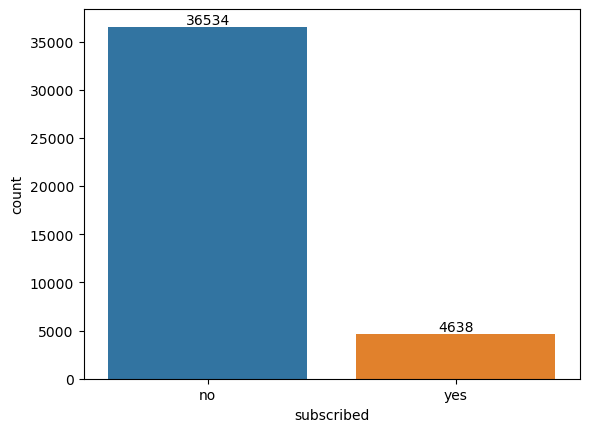

In [396]:
ax = sns.countplot(x=df['subscribed'],
                   order=df['subscribed'].value_counts(ascending=False).index);

abs_values = df['subscribed'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.show()

## Analisis de correlacion entre las variables numericas
A continuación analizaremos la correlación entre las variables numéricas para ver las relaciones existentes entre las variables y comprender mejor la data para tomar decisiones respecto a que datos dejar y cuáles quitar.

In [397]:
#dfx=df[['age','duration','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed','subscribed']]
#sns.pairplot(data=dfx, hue='subscribed', palette='crest', corner=True).fig.suptitle('Pairplot for numerical features', fontsize = 20)


## Mapa de calor de la matriz de correlación.

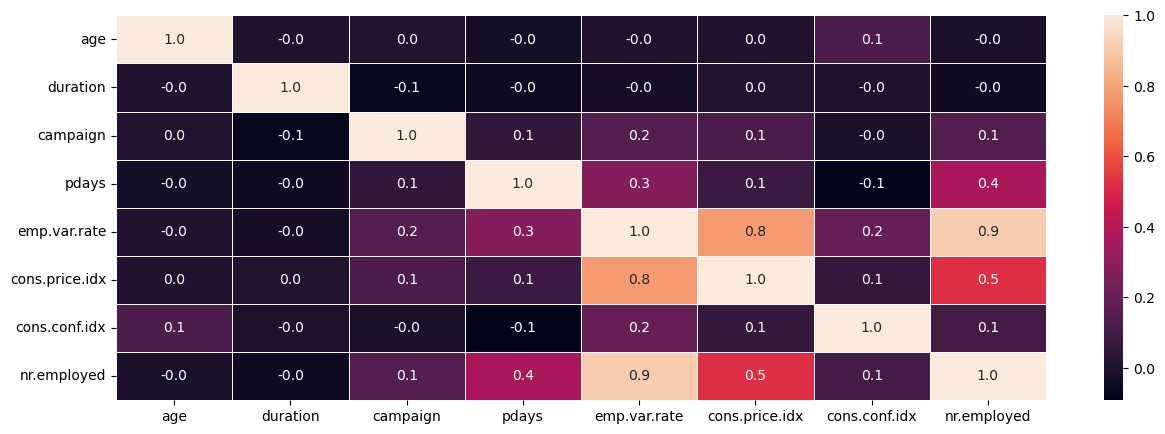

In [398]:
f, ax = plt.subplots(figsize = ( 15, 5))
sns.heatmap(numerical_cols.corr(), annot = True, linewidth = 0.5, fmt = '.1f', ax = ax )
plt.show()

De la matriz de correlación podemos concluir que la variable emp.var.rate está fuertemente correlacionada con las variables cons.price.idx y con nr.employed lo cual es un fenómeno permanente en economía ya que al variar positivamente la tasa de empleo el número de empleados por definición sube y esto a su vez conduce a mayores ingresos por parte de más personas que empiezan a devengar un salario y aumenta la demanda agregada en distintos tipos de gastos (consumo, inversion, gasto  publico, etc ) lo cual está relacionado economicamente con las alzas en los precios de los productos medidas por el índice de precios al consumo.

Con esto en mente **se eliminarán las variable emp.var.rate y nr.employed** que está correlacionadas fuertemente con otras variables debido a que no podemos incluir variables fuertemente correlacionadas en algunos modelos de ML que se emplearan porque puede confundir al algoritmo, hacerlo ineficiente y llevar resultados poco concluyentes respecto a la pregunta que nos estamos haciendo. De acuerdo con el principio de Garbage -in , Garbage out.


In [399]:
#Eliminando la columna emp.var.rate
numerical_cols.drop("emp.var.rate",axis=1,inplace=True)
df.drop("emp.var.rate",axis=1,inplace=True)
numerical_cols.drop("nr.employed",axis=1,inplace=True)
df.drop("nr.employed",axis=1,inplace=True)

/tmp/ipykernel_5230/358732413.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5230/358732413.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Observamos que entre las variables numericas ya no hay variables fuertemente correlacionadas, la mayor correlacion es de 0.5 la cual es razonable mantener para este caso.

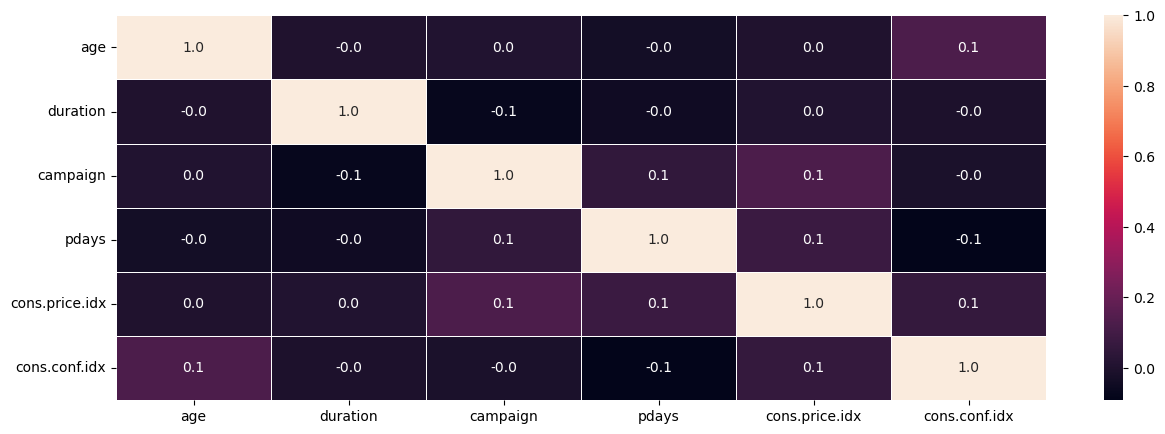

In [400]:
f, ax = plt.subplots(figsize = ( 15, 5))
sns.heatmap(numerical_cols.corr(), annot = True, linewidth = 0.5, fmt = '.1f', ax = ax )
plt.show()

In [401]:
df.drop_duplicates(keep='first',inplace=True, ignore_index=True)

In [402]:
#Revisando valores unicos de cada columna.
for col in df:
    print(f"{col} = {df[col].unique()}")

age = [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job = ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'management', 'unemployed', 'self-employed', 'entrepreneur', 'student']
Length: 11
Categories (11, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'services', 'student', 'technician', 'unemployed']
marital = ['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']
education = ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'university.degree', 'illiterate']
Categories (7, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree']
housing = ['no', 'yes']
Categories (2, object): ['no', 'yes']
loan = ['no', 'yes']
Categories (2, obje

# Feature engineering

 Una vez revisados los valores unicos de cada columna se observa que hay columnas que estan representadas por numeros pero en realidad podrian ser consideradas como categorias dada la baja cardinalidad relativa del dato con respecto a las dimensiones del dataset.
* Variable campaign : Contiene 42 valores distintos (clases) para todas las mas de 40.000 observaciones
* Variable pdays : Contiene 27 valores distintos (clases)
* La variable previous contiene 8 valores distintos(clases)
* Las variable cons.price.idx y cons.conf.idx tienen 26 valores distintos (clases)
* La variable nr.employed tiene 11 valores distintos (categorias)

Con esto en mente la estrategia por la que se opta es por dividir en bins los datos de la variable  para convertirlas a rangos y asi reducir la complejidad de la data sin perder explicabilidad para obtener un mejor performance en los modelos que se usaran.

## Dividiendo en rangos las variables con alta cardinalidad.


In [403]:
#Revisando que las variables sean consideradas como categorias para dividir los bins a los que pertenecerán
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41172 entries, 0 to 41171
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41172 non-null  int64   
 1   job             41172 non-null  category
 2   marital         41172 non-null  category
 3   education       41172 non-null  category
 4   housing         41172 non-null  category
 5   loan            41172 non-null  category
 6   contact         41172 non-null  category
 7   month           41172 non-null  category
 8   day_of_week     41172 non-null  category
 9   duration        41172 non-null  int64   
 10  campaign        41172 non-null  int64   
 11  pdays           41172 non-null  int64   
 12  previous        41172 non-null  category
 13  poutcome        41172 non-null  category
 14  cons.price.idx  41172 non-null  float64 
 15  cons.conf.idx   41172 non-null  float64 
 16  subscribed      41169 non-null  category
dtypes: category(

In [404]:
#Creando series de pandas con los valores unicos de las variables que vamos a discretizar
#para hacer mas facil su identificación.
list_campaign_values=list(df['campaign'].unique())
list_campaign_values=pd.Series(list_campaign_values)
list_campaign_values=list_campaign_values.sort_values()


list_previous_values=list(df['previous'].unique())
list_previous_values=pd.Series(list_previous_values)
list_previous_values=list_previous_values.sort_values()

list_pdays_values=list(df['pdays'].unique())
list_pdays_values=pd.Series(list_pdays_values)
list_pdays_values=list_pdays_values.sort_values()

list_consprice_values=list(df['cons.price.idx'].unique())
list_consprice_values=pd.Series(list_consprice_values)
list_consprice_values=list_consprice_values.sort_values()


list_consconf_values=list(df['cons.conf.idx'].unique())
list_consconf_values=pd.Series(list_consconf_values)
list_consconf_values=list_consconf_values.sort_values()

list_age_values=list(df['age'].unique())
list_age_values=pd.Series(list_age_values)
list_age_values=list_age_values.sort_values()

**Creando un pequeño dataframe de prueba para almacenar los valores unicos de cada variable ordenados de menor a mayor**

In [405]:

pd.concat([list_age_values,list_campaign_values,list_previous_values,list_pdays_values,list_consprice_values,list_consconf_values],
axis=1,
keys=['list_age_values','list_campaign_values','list_previous_values','list_pdays_values','list_consprice_values','list_consconf_values'])

,list_age_values,list_campaign_values,list_previous_values,list_pdays_values,list_consprice_values,list_consconf_values
69,17,NaN,NaN,NaN,NaN,NaN
43,18,NaN,NaN,NaN,NaN,NaN
42,19,NaN,NaN,NaN,NaN,NaN
39,20,33.0,NaN,NaN,NaN,NaN
40,21,34.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
71,91,NaN,NaN,NaN,NaN,NaN
76,92,NaN,NaN,NaN,NaN,NaN
74,94,NaN,NaN,NaN,NaN,NaN
50,95,NaN,NaN,NaN,NaN,NaN


## Especificaciones de la división en bins:
* La variable campaign se dividira en bins de 15 días, es decir el primer bin de [1-15) contactos previos el segundo de [15-29) contactos previos el tercero de [29-43) contactos previos y el 4 de (43-57] contactos previos abarcando todos los valores posibles.
* Se creará la variable **age_range** para agrupar a las personas en rangos de edades que van desde los 17 hastta los 98 años que son los rangos minimo y maximo de esta variable. 


* Se toma la descicion de eliminar la columna pdays debido a que el 96.3% de las observaciones son 999 lo cual 
puede ser considerado como una columna de valor unico que no aportará informacion al modelo.
* La variable previous se dejara tal y como esta ya que solo cuenta con 7 categorias.
* La variable cons.price.idx se dejara tal como esa ya que sus variaciones son tan solo de unos pocos puntos porcentuales y es posible que a la hora de seleccionar las mejores caracteristicas haya que eliminarla sin embargo la dejamos provisionalmente al igual que la columna cons.conf.idx y nr.employ




In [406]:
# Eliminando la columna pdays
df.drop("pdays",inplace=True,axis=1)

In [407]:
#Creando la columna campaign_bins que contiene el numero de contactos realizados durante esta campaña
#y para este cliente expresado en intervalo.
interval_range =pd.interval_range(start=1, freq=14, end=60, closed='left')
df['campaign_bins'] = pd.cut(df['campaign'], bins=interval_range)
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed,campaign_bins
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,93.994,-36.4,no,"[1, 15)"
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,93.994,-36.4,no,"[1, 15)"
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,93.994,-36.4,no,"[1, 15)"
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,93.994,-36.4,no,"[1, 15)"
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,93.994,-36.4,no,"[1, 15)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41167,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,0,nonexistent,94.767,-50.8,yes,"[1, 15)"
41168,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,0,nonexistent,94.767,-50.8,no,"[1, 15)"
41169,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,0,nonexistent,94.767,-50.8,NaN,"[1, 15)"
41170,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,0,nonexistent,94.767,-50.8,NaN,"[1, 15)"


Revisando los bins obtenidos.

In [408]:
df['campaign_bins'].value_counts()

[1, 15)     40766
[15, 29)      356
[29, 43)       47
[43, 57)        3
Name: campaign_bins, dtype: int64

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41172 entries, 0 to 41171
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41172 non-null  int64   
 1   job             41172 non-null  category
 2   marital         41172 non-null  category
 3   education       41172 non-null  category
 4   housing         41172 non-null  category
 5   loan            41172 non-null  category
 6   contact         41172 non-null  category
 7   month           41172 non-null  category
 8   day_of_week     41172 non-null  category
 9   duration        41172 non-null  int64   
 10  campaign        41172 non-null  int64   
 11  previous        41172 non-null  category
 12  poutcome        41172 non-null  category
 13  cons.price.idx  41172 non-null  float64 
 14  cons.conf.idx   41172 non-null  float64 
 15  subscribed      41169 non-null  category
 16  campaign_bins   41172 non-null  category
dtypes: category(

In [410]:
#Creando la columna age_range que contiene el intervalo de edad en el que se encuentra el cliente
interval_range =pd.interval_range(start=15, freq=13, end=108, closed='left')
df['age_range'] = pd.cut(df['age'], bins=interval_range)
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed,campaign_bins,age_range
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,93.994,-36.4,no,"[1, 15)","[54, 67)"
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,93.994,-36.4,no,"[1, 15)","[54, 67)"
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,93.994,-36.4,no,"[1, 15)","[28, 41)"
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,93.994,-36.4,no,"[1, 15)","[28, 41)"
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,93.994,-36.4,no,"[1, 15)","[54, 67)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41167,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,0,nonexistent,94.767,-50.8,yes,"[1, 15)","[67, 80)"
41168,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,0,nonexistent,94.767,-50.8,no,"[1, 15)","[41, 54)"
41169,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,0,nonexistent,94.767,-50.8,NaN,"[1, 15)","[54, 67)"
41170,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,0,nonexistent,94.767,-50.8,NaN,"[1, 15)","[41, 54)"


In [411]:
df['age_range'].value_counts()

[28, 41)     20546
[41, 54)     12502
[54, 67)      4350
[15, 28)      3213
[67, 80)       411
[80, 93)       146
[93, 106)        4
Name: age_range, dtype: int64

Notas:
 * La variable job  es una variable con una cardinalidad de 11 lo que quiere decir que puede tomar 11 valores distintos :
 admini, blue-collar(obrero), services, management,retired,entrepreneur,self_employed,housemaid,unemployed,student.

    Crearemos la variable derivada **Income** que indica si la persona percibe ingresos o no .
 
    En este caso asumiremos que **housemaid,unemployed y student** entran en la categoría de personas que no devengan ingresos por lo tanto su valor en la variable income sera False. Los demas trabajadores incluyendo personas pensionadas (retired) entran en la categoria de personas que si devengan ingresos y por lo tanto su valor en la variable Income sera True.

* La variable education puede tomar 7 valores distintos :
university.degree, high.schol, basic.9y ,professional.course, basic.4y , basic.6y, illiterate, para reducir un poco la cardinalidad de esta variable crearemos la columna derivada **niv_ed** que contendra para cada ejemplo los valores sin_educacion, basica, bachillerato, profesional pasando de 7 a 4 categorias.

* La variable previous tiene un 86% de observaciones con el valor de 0 lo que indica que fue el primer contacto realizado con este cliente y el resto de valores que componen el 12% indican que fue entre el primer y el septimo contacto. Por lo tanto esta variable tiene una cardinalidad de 7 la cual podemos reducir creando una columna derivada que indique si fue el primer contacto del cliente o no para reducir la complejidad sin perder informacion valiosa. Se creará la columna derivada first_contact la cual indicará si fue el primer contacto con el cliente o no.

In [412]:
## Creando columna Income

#Lista de condiciones
conditions = [
    (df['job'] =='admin.'),
    (df['job'] =='blue-collar'),
    (df['job'] =='technician'),
    (df['job'] =='services'),
    (df['job'] =='management'),
    (df['job'] =='retired'),
    (df['job'] =='entrepreneur'),
    (df['job'] =='self-employed'),
    (df['job'] =='housemaid'),
    (df['job'] =='unemployed'),
    (df['job'] =='student')
    ]

values = [1,1,1,1,1,1,1,1,1,0,0]

#Creando columna income
df['Income'] = np.select(conditions, values)


df['Income'].value_counts()

1    39283
0     1889
Name: Income, dtype: int64

In [413]:
df['education'].value_counts()

university.degree      13892
high.school             9512
basic.9y                6044
professional.course     5240
basic.4y                4175
basic.6y                2291
illiterate                18
Name: education, dtype: int64

In [414]:
## Creando columna niv_ed
#Lista de condiciones
conditions = [
    (df['education'] =='basic.4y'),
    (df['education'] =='basic.6y'),
    (df['education'] =='basic.9y'),
    (df['education'] =='high.school'),
    (df['education'] =='professional.course'),
    (df['education'] =='university.degree'),
    (df['education'] =='illiterate')
    ]

values = ['basica','basica','basica','bachillerato','profesional','profesional','sin_educacion']

#Creando columna niv_ed
df['niv_ed'] = np.select(conditions, values)


df['niv_ed'].value_counts()

profesional      19132
basica           12510
bachillerato      9512
sin_educacion       18
Name: niv_ed, dtype: int64

In [415]:
## Creando columna first_contact
#Lista de condiciones
conditions = [
    (df['previous'] ==0),
    (df['previous'] ==1),
    (df['previous'] ==2),
    (df['previous'] ==3),
    (df['previous'] ==4),
    (df['previous'] ==5),
    (df['previous'] ==6),
    (df['previous'] ==7),
    ]

values = [1,0,0,0,0,0,0,0]

#Creando columna niv_ed
df['first_contact'] = np.select(conditions, values)


df['first_contact'].value_counts()

1    35547
0     5625
Name: first_contact, dtype: int64

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41172 entries, 0 to 41171
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41172 non-null  int64   
 1   job             41172 non-null  category
 2   marital         41172 non-null  category
 3   education       41172 non-null  category
 4   housing         41172 non-null  category
 5   loan            41172 non-null  category
 6   contact         41172 non-null  category
 7   month           41172 non-null  category
 8   day_of_week     41172 non-null  category
 9   duration        41172 non-null  int64   
 10  campaign        41172 non-null  int64   
 11  previous        41172 non-null  category
 12  poutcome        41172 non-null  category
 13  cons.price.idx  41172 non-null  float64 
 14  cons.conf.idx   41172 non-null  float64 
 15  subscribed      41169 non-null  category
 16  campaign_bins   41172 non-null  category
 17  age_range   

In [417]:
categorical_cols=['job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'campaign_bins', 'Income', 'niv_ed']
df[categorical_cols]=df[categorical_cols].astype("category")

## Aplicando encoding a las columnas categoricas para las pruebas estadisticas

Es necesario aplicar un label encoder u ordinal encoder para transformar las categorias en numeros, para la columna niv_ed que implica un orden aplicaremos un ordinal enconder, para las demas que no reprersentan una jerarquia particular aplicaremos otros tipos de encoding como label encoding u one hot encoding de ser necesario.



In [418]:
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed,campaign_bins,age_range,Income,niv_ed,first_contact
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,0,nonexistent,93.994,-36.4,no,"[1, 15)","[54, 67)",1,basica,1
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,0,nonexistent,93.994,-36.4,no,"[1, 15)","[54, 67)",1,bachillerato,1
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,0,nonexistent,93.994,-36.4,no,"[1, 15)","[28, 41)",1,bachillerato,1
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,0,nonexistent,93.994,-36.4,no,"[1, 15)","[28, 41)",1,basica,1
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,0,nonexistent,93.994,-36.4,no,"[1, 15)","[54, 67)",1,bachillerato,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41167,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,...,0,nonexistent,94.767,-50.8,yes,"[1, 15)","[67, 80)",1,profesional,1
41168,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,...,0,nonexistent,94.767,-50.8,no,"[1, 15)","[41, 54)",1,profesional,1
41169,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,...,0,nonexistent,94.767,-50.8,NaN,"[1, 15)","[54, 67)",1,profesional,1
41170,44,technician,married,professional.course,no,no,cellular,nov,fri,442,...,0,nonexistent,94.767,-50.8,NaN,"[1, 15)","[41, 54)",1,profesional,1


marital - one hot solo 3 categorias
housing -one hot solo 2 categorias
loan -one hot solo 2 cat
contact- soloo 2 cat
month -10 categorias
day_of_week - 5 categorias
campain_bins -4 categorias
previous - 8 categorias
poutcome - 3 categorias
subscribed - label encoder


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41172 entries, 0 to 41171
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41172 non-null  int64   
 1   job             41172 non-null  category
 2   marital         41172 non-null  category
 3   education       41172 non-null  category
 4   housing         41172 non-null  category
 5   loan            41172 non-null  category
 6   contact         41172 non-null  category
 7   month           41172 non-null  category
 8   day_of_week     41172 non-null  category
 9   duration        41172 non-null  int64   
 10  campaign        41172 non-null  category
 11  previous        41172 non-null  category
 12  poutcome        41172 non-null  category
 13  cons.price.idx  41172 non-null  float64 
 14  cons.conf.idx   41172 non-null  float64 
 15  subscribed      41169 non-null  category
 16  campaign_bins   41172 non-null  category
 17  age_range   

In [420]:
df.select_dtypes(include='category', exclude=None).columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'campaign', 'previous', 'poutcome', 'subscribed',
       'campaign_bins', 'age_range', 'Income', 'niv_ed'],
      dtype='object')

Guardando el dataset limpio

In [421]:
df.to_csv("../data/interim/bank_clean.csv")

In [422]:
df_encoded=df.copy()


In [423]:
df_encoded

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed,campaign_bins,age_range,Income,niv_ed,first_contact
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,0,nonexistent,93.994,-36.4,no,"[1, 15)","[54, 67)",1,basica,1
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,0,nonexistent,93.994,-36.4,no,"[1, 15)","[54, 67)",1,bachillerato,1
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,0,nonexistent,93.994,-36.4,no,"[1, 15)","[28, 41)",1,bachillerato,1
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,0,nonexistent,93.994,-36.4,no,"[1, 15)","[28, 41)",1,basica,1
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,0,nonexistent,93.994,-36.4,no,"[1, 15)","[54, 67)",1,bachillerato,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41167,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,...,0,nonexistent,94.767,-50.8,yes,"[1, 15)","[67, 80)",1,profesional,1
41168,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,...,0,nonexistent,94.767,-50.8,no,"[1, 15)","[41, 54)",1,profesional,1
41169,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,...,0,nonexistent,94.767,-50.8,NaN,"[1, 15)","[54, 67)",1,profesional,1
41170,44,technician,married,professional.course,no,no,cellular,nov,fri,442,...,0,nonexistent,94.767,-50.8,NaN,"[1, 15)","[41, 54)",1,profesional,1


Aplicando label encoder a las variables para poder realizar un test como el chi cuadrado.

In [424]:
label_encoder = LabelEncoder()
for i in (df_encoded.select_dtypes(include='category', exclude=None).columns):
    df_encoded[i] = label_encoder.fit_transform(df_encoded[i])

In [425]:
df_encoded['subscribed'].replace(2,np.nan,inplace=True)

In [426]:
df_encoded

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed,campaign_bins,age_range,Income,niv_ed,first_contact
0,56,3,1,0,0,0,1,6,1,261,...,0,1,93.994,-36.4,0.0,0,3,1,1,1
1,57,7,1,3,0,0,1,6,1,149,...,0,1,93.994,-36.4,0.0,0,3,1,0,1
2,37,7,1,3,1,0,1,6,1,226,...,0,1,93.994,-36.4,0.0,0,1,1,0,1
3,40,0,1,1,0,0,1,6,1,151,...,0,1,93.994,-36.4,0.0,0,1,1,1,1
4,56,7,1,3,0,1,1,6,1,307,...,0,1,93.994,-36.4,0.0,0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41167,73,5,1,5,1,0,0,7,0,334,...,0,1,94.767,-50.8,1.0,0,4,1,2,1
41168,46,1,1,5,0,0,0,7,0,383,...,0,1,94.767,-50.8,0.0,0,2,1,2,1
41169,56,5,1,6,1,0,0,7,0,189,...,0,1,94.767,-50.8,NaN,0,3,1,2,1
41170,44,9,1,5,0,0,0,7,0,442,...,0,1,94.767,-50.8,NaN,0,2,1,2,1


## Análisis vibariado : Variables categoricas vs target
Se usara el test chi cuadrado para contrastar las variables categoricas contra la variable target y determinar si existe una diferencia significativa entre los clientes que se suscribieron o no al servicio dependiendo de cada una de las caracteristicas categoricas que tenemos de la llamada.

De esta manera podremos observar que datos deben ser mantenidos en el dataset y que datos no deben estarlo.

In [427]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} es importante para predecir".format(colX)
        else:
            result="{0} no es importante para predecir. (descartar {0} del modelo)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index =                                                       self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [428]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41172 entries, 0 to 41171
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41172 non-null  int64  
 1   job             41172 non-null  int64  
 2   marital         41172 non-null  int64  
 3   education       41172 non-null  int64  
 4   housing         41172 non-null  int64  
 5   loan            41172 non-null  int64  
 6   contact         41172 non-null  int64  
 7   month           41172 non-null  int64  
 8   day_of_week     41172 non-null  int64  
 9   duration        41172 non-null  int64  
 10  campaign        41172 non-null  int64  
 11  previous        41172 non-null  int64  
 12  poutcome        41172 non-null  int64  
 13  cons.price.idx  41172 non-null  float64
 14  cons.conf.idx   41172 non-null  float64
 15  subscribed      41169 non-null  float64
 16  campaign_bins   41172 non-null  int64  
 17  age_range       41172 non-null 

In [429]:

Chi_test= ChiSquare(df_encoded)


In [430]:
df_encoded.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'subscribed', 'campaign_bins',
       'age_range', 'Income', 'niv_ed', 'first_contact'],
      dtype='object')

Verificando segun el test chi2 que variables son relevantes y cuales no para la prediccion

In [431]:
cols_to_chi2=['marital', 'housing', 'loan', 'contact', 'month', 'day_of_week',
 'previous', 'poutcome','subscribed', 'campaign_bins', 'Income', 'niv_ed']
for var in cols_to_chi2:
    Chi_test.TestIndependence(colX=var,colY='subscribed')

marital es importante para predecir
housing no es importante para predecir. (descartar housing del modelo)
loan no es importante para predecir. (descartar loan del modelo)
contact es importante para predecir
month es importante para predecir
day_of_week es importante para predecir
previous es importante para predecir
poutcome es importante para predecir
subscribed es importante para predecir
campaign_bins es importante para predecir
Income es importante para predecir
niv_ed es importante para predecir


Datos los resultados del test chi2 se optara por descartar las variables housing y loan debido a que no son variables que exhiban diferencias signifativas entre los suscritos y no suscritos al servicio por lo cual es probable que no aporten demasiada informacion al modelo y por el contrario afecten su desempeño.


In [432]:
df_encoded.drop(["housing",'loan'],axis=1,inplace=True)
df.drop(["housing",'loan'],axis=1,inplace=True)


In [433]:
df_encoded

,age,job,marital,education,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed,campaign_bins,age_range,Income,niv_ed,first_contact
0,56,3,1,0,1,6,1,261,0,0,1,93.994,-36.4,0.0,0,3,1,1,1
1,57,7,1,3,1,6,1,149,0,0,1,93.994,-36.4,0.0,0,3,1,0,1
2,37,7,1,3,1,6,1,226,0,0,1,93.994,-36.4,0.0,0,1,1,0,1
3,40,0,1,1,1,6,1,151,0,0,1,93.994,-36.4,0.0,0,1,1,1,1
4,56,7,1,3,1,6,1,307,0,0,1,93.994,-36.4,0.0,0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41167,73,5,1,5,0,7,0,334,0,0,1,94.767,-50.8,1.0,0,4,1,2,1
41168,46,1,1,5,0,7,0,383,0,0,1,94.767,-50.8,0.0,0,2,1,2,1
41169,56,5,1,6,0,7,0,189,1,0,1,94.767,-50.8,NaN,0,3,1,2,1
41170,44,9,1,5,0,7,0,442,0,0,1,94.767,-50.8,NaN,0,2,1,2,1


## Analisis de variables numericas vs target

In [434]:
numeric_cols_test=['age','duration','cons.price.idx','cons.conf.idx','subscribed']

df_enc_corr = df_encoded[numeric_cols_test].corr()
px.imshow(df_enc_corr,  width=800, height=800)

In [435]:
df_encoded.columns

Index(['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'previous', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'subscribed', 'campaign_bins', 'age_range', 'Income',
       'niv_ed', 'first_contact'],
      dtype='object')

In [436]:
df.columns

Index(['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'previous', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'subscribed', 'campaign_bins', 'age_range', 'Income',
       'niv_ed', 'first_contact'],
      dtype='object')

## Guardando el dataset final

In [437]:
df.to_csv("../data/processed/bank_campaign_final.csv")

## Conclusiones:

Se han eliminado columnas fuertemente correlacionadas, columnas que no aportan informacion al modelo, y columnas no relevantes deacuerdo a los test estadisticos utilizados y se han añadido columnas derivadas para enriquecer la calidad de los datos con los que alimentaremos los modelos

**En el proximo notebook pasaremos a la parte del modelado** 


## Referencias

https://medium.com/nerd-for-tech/class-imbalance-problem-and-ways-to-handle-it-4861a195398a

https://medium.com/analytics-vidhya/complete-guide-to-data-cleaning-with-python-8c686104686c

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79


Autor : 
**Nicolas Restrepo Carvajal** 

https://www.linkedin.com/in/niconomist98/

https://github.com/niconomist98



